# Kepler et Runge-Kutta 4
# Travail personnel 1, MATH-F-314, Année académique 2017-2018

## Guillaume LEMAIGRE & Rossen DIMITROV

### Question n°1


Pour commencer, nous avons un problème à deux corps, il est donc intéressant de regarder le problème depuis le réferentiel du centre de masse.

Le centre de masse : $${\bf R} = \frac{m_1{\bf r_1} + m_2{\bf r_2}}{M}$$ 
où $M = m_1 + m_2$

Le centre de masse ne subissant aucune force extérieur, il est dans son référentiel intertiel, et son équation de mouvement est:

$$M{\bf \ddot{R}}=0$$

Introduisons la position relative l'objet $1$ par rapport à l'objet $2$ : 

$${\bf r}={\bf r_1}-{\bf r_2}$$

A partir des équations du mouvement, nous pouvons écrire : 

$${\bf \ddot{r}} = {\bf \ddot{r_1}}-{\bf \ddot{r_2}} = \frac{{\bf F}_{1,2}}{m_1} - \frac{{\bf F}_{2,1}}{m_1} = - \left( \frac{1}{m_1} + \frac{1}{m_2} \right) \frac{dU}{dr} \frac{\bf r}{r}$$

avec $r=\left\Vert{\bf r} \right\Vert$ et en vertu du fait que pour la force de gravité : 

$${\bf F}_{1,2}=-{\bf F}_{2,1}=-\frac{Gm_1 m_2{\bf r}}{r^3}$$

en posant : $$\frac{1}{\mu} = \left( \frac{1}{m_1} + \frac{1}{m_2} \right) \Leftrightarrow \mu = \frac{m_1m_2}{m_1+m_2}$$

nous trouvons: $$\mu{\bf \ddot{r}}= - \frac{dU}{dr}\frac{\bf r}{r}$$

Dans le cas de la gravité, nous avons: $$\mu{\bf \ddot{r}}= - \frac{{\bf F}_{2,1}m_1m_2}{r^2}\frac{\bf r}{r}$$

Et donc: $${\bf \ddot{r}}= - \frac{{\bf F}_{2,1}M}{r^2}\frac{\bf r}{r}$$

Nous avons maintenant une équation différentielle qui traduit la variation de distance entre nos deux objects. 

Nous pouvons ainsi crée un système tel que : 
$$u=\left(\begin{array}{c} {\bf r}\\ {\bf v}\\ \end{array} \right)$$ 

Avec ${\bf \dot{r}}={\bf v}$ et ${\bf \ddot{r}}={\bf \dot{v}}={\bf a}$, nous pouvons trouver : $$\dot{u}=f(u)=\left( \begin{array}{c} {\bf \dot{x}}\\ {\bf\dot{v}}\\ \end{array}\right)=\left( \begin{array}{c} {\bf v}\\ {\bf a}\\ \end{array}\right)$$

Or nous savons que dans notre cas, l'accélération est une fonction de la position, nous pouvons donc résoudre ce système différentiel avec la méthode de Runge Kuta.

En appliquant les conditions initiales données dans l'énoncé, nous faisont évoluer notre vecteur $u$. Ceci peut s'interpréter comme si la Terre était atachée au en centre du référentiel et que le vecteur nous donnne la trajectoire de la Lune autour de la Terre.

In [1]:
from math import log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from IPython.display import HTML

In [2]:
#valeurs de départ et conditions initiales.
G = 6.67408e-11
mt = 5.972e24 # masse de la Terre
ml = 7.348e22 # masse de la lune
M = mt+ml
rmin = 362600000. # distance Terre-Lune au périgée. 
vpérigée = 1083.434974 # Vitesse de la lune relative à la Terre au périgé de la lune. 

dt = 1. # incrément de temp. 

In [3]:
#on pose notre vecteur de départ, et la liste pour la trajectoire. 
#on va supposer de manière conservative que l'orbite dure moins que 28 jours.
t=28*24*60*60 #nombre de secondes ou "step" dans 28 jours. 
u_i=numpy.array([-rmin,0.,0.,vpérigée])
u = numpy.empty((t, 4)) 
u[0] = u_i

In [4]:
#On défini ici la fonction différentielle de notre vecteur u.
def f(u):
    f1=u[2]
    f2=u[3]
    f3=-u[0]*G*M/((u[0]**2 +u[1]**2)**(3/2))
    f4=-u[1]*G*M/((u[0]**2 +u[1]**2)**(3/2))
    
    return numpy.array([f1,f2,f3,f4])

#implémentation de l'algorythme RK4 pour u.
def RK4(u,dt,f):
    k1 = f(u)
    k2 = f(u+(dt*k1)/2)
    k3 = f(u+(dt*k2)/2)
    k4 = f(u+dt*k3)
        
    return u+(dt/6)*(k1+2*k2+2*k3+k4)

#la fonction qui calcule la trajectoire finale. 
def kepler (u,N):
    for i in range(N-1):
        u[i+1]=RK4(u[i],dt,f)
    return u

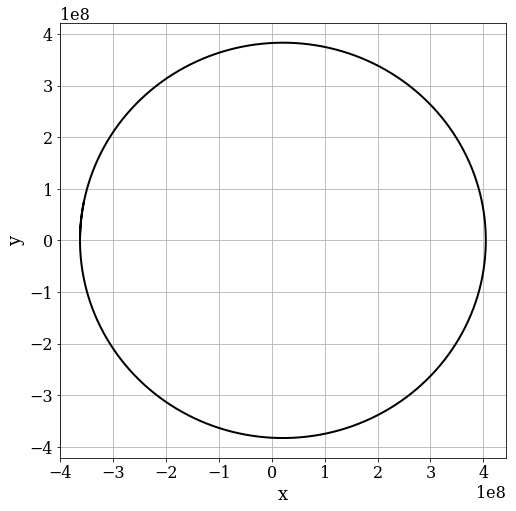

In [5]:
kepler(u,t)

#le graphique assez basique, copié du tuto.
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.plot(u[:,0],u[:,1], 'k-', lw=2);

### Question n°2

Dans ce cas nous allons calculer le demi-grand axe de l'ellipse tracée par la trajectore de la Lune autour de la Terre, dans le référentiel où la terre est fixée à l'origine. 

Ainsi, le demi grand axe $a$ sera définit par: $$a =  \frac{distance_{Terre,périgée} + distance_{Terre,apogée}}{2}$$

Pour le demi grand axe $b$, il suffit considérer le point le maximum de la trajectoire en $y$.

Si nous voulons avoir le demi grand axe apparent dans le référentiel du centre de masse, il suffit de soustraire la position du centre de masse aux distances utilisées dans nos calculs. Ce qui reviendrais à faire $distance_{CM,Lune}=disance_{Terre,Lune}\frac{m_{Lune}}{M}$ . En développant ceci revient à multiplier nos demi grand axe par $\frac{m_{Lune}}{M}$.
Mais il me semble que ce n'est pas cette valeurs qui est demandée dans l'énoncé. 

In [6]:
#calcul de demi-grand axe a
j=0
while u[j,1]>=0: # on s'arrête à l'apogée, donc quand "y" est passe zéro. 
    j=j+1
    
t_apogée=j
dga_a=((-u[0,0])+u[j,0])/2 #le demi grand axe a
print('demi grand axe a = {}m'.format(dga_a))

#calcul du demi-grand axe b
j=0
while u[j,3]>0: # on s'arrête quand la vitesse en y devient nulle. 
    j=j+1
    
dga_b=u[j,1]
print('demi grand axe b = {}m'.format(dga_b))

demi grand axe a = 383663116.4330342m
demi grand axe b = 383084497.25404537m


### Calcul de l'excentricité (qui devait être dans la question 1)

Pour le calcul de l'excentricité, nous partons de la formule théorique donnée dans l'énoncé : $$r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos\theta}.$$ 

On a $$r(0)=r_{min}$$ et $$r(\pi)=\frac{r_{min}(1+\epsilon)}{1-\epsilon}.$$ 

On peut observer que: $$r(0)+r(\pi)=2a$$ Où $a$ est le demi grand axe horizontal de notre ellipse. 

En dévellopant on trouve donc que : $$\epsilon=1-\frac{r_{min}}{a}$$

In [7]:
#calcul de l'excentricité 
epsilon = 1-((-u[0,0])/dga_a)
print("l'excentricité de notre ellipse : Є = {}".format(epsilon))

l'excentricité de notre ellipse : Є = 0.054900029559423635


### Question n°3

Il est important de noter que par symétrie dans le temps des équestions de la mécanique, le trajet du périgée à l'apogée prend autant de temps que le trajet inverse. La ligne reliant l'apogée au périgée coupant l'elipse parfaitement en deux, on conclure que le temps de l'orbite correspond au double du temps du périgée à l'apogée. 

Comme il est relativement plus facile de calculer ce temps en question, et qu'il a déjà été calculé dans le dévellopement de la question deux, c'est ainsi que nous allons trouver le temps de notre orbite. 

In [8]:
#préiode de l'orbite

torb = 2*t_apogée

t1= int((torb/60 - int(torb/60))*60)+1 #secondes
t2= int(((torb/(60*60)) - int((torb/(60*60))))*60) #minutes
t3= int((torb/(60*60*24)-int(torb/(60*60*24)))*24) #heures
t4=int((torb/(60*60*24))) #jours

print("temps de l'orbite en secondes = {}s".format(torb))
print('Ceci équivaut à : {} jours,'.format(t4),'{} heures,'.format(t3),'{} minutes,'.format(t2),'{} secondes.'.format(t1))

temps de l'orbite en secondes = 2350682s
Ceci équivaut à : 27 jours, 4 heures, 58 minutes, 2 secondes.


### Question n°4

Pour trouver l'ordre numérique de la méthode de résolution de notre problème, nous allons utiliser la méthode décrite dans le module 1.3 du MOOC.

Nous prennons des pas $dt$ plus grand au lieu de plus petit. En effet avec un $dt = 1s$, nous avons déjà une très bonne précision. Par conséquent, si nous voulons voir comment la méthode converge, nous avons besoins d'autres trajectoires moins précise, et donc avec des $dt$ plus grand. 

In [9]:
dt_values = numpy.array([100000.,10000., 1000., 100., 10.])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
       
    N = int(t/dt) + 1    # nombre d'étapes

    u_conv = numpy.empty((N, 4)) #on définit une nouvelle liste vide.
    u_conv[0] = u_i #et on lui attribue la condition initiale. 

    kepler(u_conv,N) #on calcule les trajectoires
    
    u_values[i] = u_conv #et on les garde en mémoire

#cette fonction va caluler la différence entre les élément de deux liste en tenant compte du fait qu'elle n'ont pas le même -
# -quadrillage.
def get_diffgrid(u_grand, u_petit, dt):
    
    N_grand = len(u_grand[:,0]) # Taille de N_grand
    N_petit = len(u_petit[:,0]) # Taille de N_petit
   
    grid_size_ratio = ceil(N_petit/N_grand)
    
    diffgrid = dt * numpy.sum( numpy.abs(u_grand[:,2]- u_petit[::grid_size_ratio,2])) 
    
    return diffgrid

# On va calculer la différence entres les grilles et la plus petite;
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

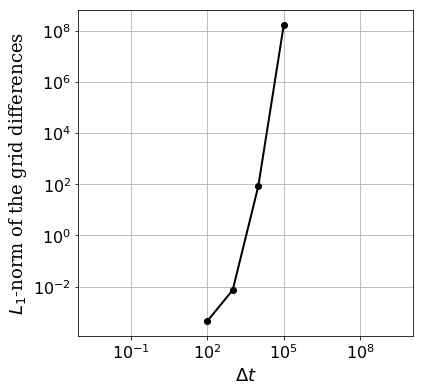

In [10]:
# Graphe log-log des différences:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

Pour calculer l'ordre de convergence de la méthode, on applique la formule suivante:
$$
\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}
$$

Comme la méthode semble coverger assez vite, nous allons utiliser les valeurs de $dt = 100$, $1000$ et $10000$, avec un ratio $r =  10$, suffisament grand pour éviter d'être influencé par les erreur d'arondis de la machine.


In [11]:
r=10
diffgrid2 = numpy.empty(2)
# on calcule f2 - f1
diffgrid2[0] = get_diffgrid(u_values[2], u_values[3], dt_values[2])

# on calcule f3 - f2
diffgrid2[1] = get_diffgrid(u_values[1], u_values[2], dt_values[1])

# on calcule p:
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print("L'ordre de convergence : p = {:.3f}".format(p));


L'ordre de convergence : p = 4.035


### Question n°5

Pour calculer la trajectoire de notre astéroïde, nous allons appliquer la même méthode que pour $\bf r$. Nous devons évidemment tenir en compte de la force subie créee par la Terre et par la Lune. La force résultante étant simplement la somme des deux forces.

In [18]:
#nombre de step (ou sencondes) pour le tracking de l'astéroïde sur 14 jours. 
t14=14*24*60*60 
 
# On définit les conditions initiales de l'astéroïde
ua_i=numpy.array([dga_a-rmin,0.,-500.,500.]) # vecteur initial.
ua = numpy.empty((t14, 4)) #on la définit remplie de zéro. On va pouvoir la tarajectoire dedans.
ua[0] = ua_i
dt = 1 #on doit la remettre à 1 car elle a été modifiée pour la question n°4

In [13]:
#la fonction différentiel pour l'astéroïde est différente car on doit tenir compte de l'effet de la Lune. 
#Ici on dépend du temps car la position de la Lune change avec le temps.
def fa(v,k):
    f1=v[2]
    f2=v[3]
    f3=-v[0]*G*mt/((v[0]**2 +v[1]**2)**(3/2)) - (v[0]-u[k,0])*G*ml/(((v[0]-u[k,0])**2 + (v[1]-u[k,1])**2)**(3/2))
    f4=-v[1]*G*mt/((v[0]**2 +v[1]**2)**(3/2)) - (v[1]-u[k,1])*G*ml/(((v[0]-u[k,0])**2 + (v[1]-u[k,1])**2)**(3/2))
    
    return numpy.array([f1,f2,f3,f4])

#rk4 pour l'astéroïde, la première version est définie pour la première fonctions.
def RK4a(u,k,f):
    k1 = f(u,k)
    k2 = f(u+(dt*k1)/2,k)
    k3 = f(u+(dt*k2)/2,k)
    k4 = f(u+(dt*k3),k)
        
    return u+(dt/6)*(k1+2*k2+2*k3+k4)
    
#note que ici k n'est que l'indice de la position dans la liste u_rk4, et donc n'est pas une variable temporelle. 

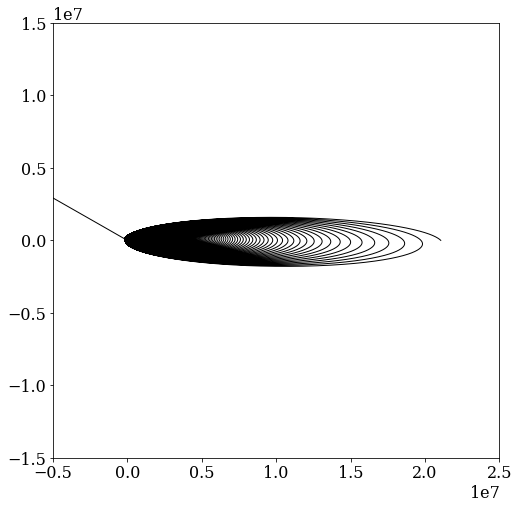

In [14]:
#on calcule la trajectoire,
for i in range(t14-1) : #condition d'arrêt : remplire la liste u_rk4
    ua[i+1]=RK4a(ua[i],i+t_apogée,fa)        

#et ensuite on en fait un joli graphique. 
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.axes(xlim=(-0.5e7,2.5e7), ylim=(-1.5e7,1.5e7))
pyplot.plot(ua[:,0],ua[:,1], color='#000000', lw=1);

### Question n°6

Nous avons déjà notre trajectoire, nous n'avons plus qu'à la mettre en animation. 
Cependant nous pouvons voir que l'astéroïde finit par être éjecté du système, on peut donc se demander quand, afin de ne pas faire tourner notre animation plus longtemps que nécéssaire. 

In [15]:
time_of_exit=1
while numpy.abs(ua[time_of_exit,0]) < ua[0,0]:
    time_of_exit+=1
    
#ce n'est pas à proprement parler le vrai temps, mais une approche largement suffisante pour ce dont on en a besoin. 
print(time_of_exit)

time_of_frame = int((numpy.ceil(time_of_exit/10000))*10000/50)
print(time_of_frame)

326297
6600


Nous savons qu'il est inutile de mettre en animation plus loin que le moment où l'astéroïde est éjecté du système terrestre car il sera beaucoup trop loin pour être affiché. "time_of_frame" nous donne le nombre de frame à demander à l'animation en considérant que nous prenons un point tout les 50 points dans notre liste. Ceci implique que nous affichons jusqu'à (time_of_frame x 50) secondes, et comme nous avons fait un arrondi supérieur au prochain multiple de 10000 secondes depuis le "time_of_exit", nous savons que nous aurons toutes la trajectoire de l'astéroïde jusqu'à ce qu'elle touche la Terre. 

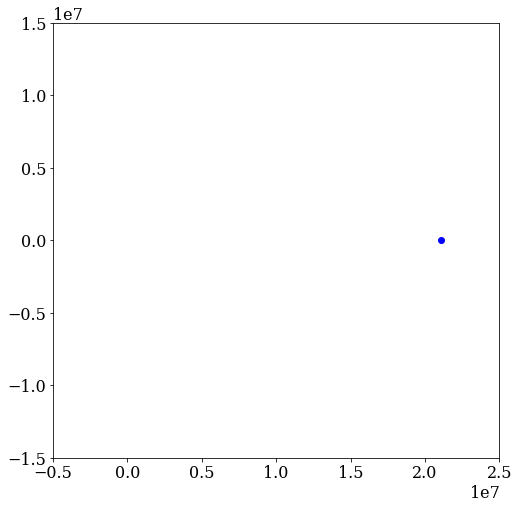

In [16]:
# paramètre de l'animation
fig = pyplot.figure(figsize=(8,8))
ax = pyplot.axes(xlim=(-0.5e7,2.5e7), ylim=(-1.5e7,1.5e7))
line = ax.plot([], [],'bo', lw=3)[0]

#fonction qui attribue les points nécéssaires pour chaque frame. 
def animate(i):
    line.set_data(ua[i*50,0],ua[i*50,1])

anim = animation.FuncAnimation(fig, animate, frames=time_of_frame, interval=10)

In [17]:
HTML(anim.to_html5_video())

Au cours de la Trajectoire de notre astéroïde, nous avons à faire à un phénomène non physique. 
En affichant le graphe de la trajectoire et en effectuant un zoom proche d la terre, nous pouvons observer que dans sa déscente vers la Terre, l'astéroïde finit par être éjectée. 

Le premier point à considérer est que la Terre est un point, et non un volume. Ainsi l'astéroïde peut s'en approcher infiment, et dans la limite où la distance qui les sépare tend vers zéro, la force de gravité tend vers l'infini. Ainsi, il se trouve que après un certain nombre d'itération, notre astéroïde se trouve éventuellement plus proche de la Terre qu'il n'est possible, à ce point elle subit un force très élevée qui la propulse loin en dehors du système terestre. 

Une deuxième considération par rapport à la trajectoire d'éjection de l'astéroïde, est l'espilon machine. En effet, nous avons à faire à problème d'arrondis qui en se répercutant peuvent générer une erreur sur la position finale (i.e. dernier point calculé avant d'être éjectée). Le point final possedant une incertitude, ceci se répercute dirrectement sur la trajectoire finale qui est très sensible à cette condition. 